In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("data_cleaned.csv")
data.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


In [3]:
data.shape

(891, 25)

##### Check for any missing values

In [4]:
data.isnull().sum()

Survived      0
Age           0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Sex_female    0
Sex_male      0
SibSp_0       0
SibSp_1       0
SibSp_2       0
SibSp_3       0
SibSp_4       0
SibSp_5       0
SibSp_8       0
Parch_0       0
Parch_1       0
Parch_2       0
Parch_3       0
Parch_4       0
Parch_5       0
Parch_6       0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

##### Seperating the Independent &  Dependent(Target) variable

In [5]:
X = data.drop(["Survived"], axis=1 )#Independent variables
y = data["Survived"] #Target Variable

##### To create test Set, imort the train test function

In [6]:
from sklearn.model_selection import train_test_split

##### By eqauting stratify=y, we can make the distribution same in train and test sets w.r.t "y" i.e the target variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101, stratify= y)

##### Distribution in Training Set

In [8]:
y_train.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

##### Distribution in Testing Set

In [9]:
y_test.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

##### Shape of Training Set

In [10]:
X_train.shape, X_test.shape

((668, 24), (223, 24))

##### Shape of Testing Set

In [12]:
y_train.shape, y_test.shape

((668,), (223,))

##### import Decisiontree classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier(random_state=10)

##### Fitting the model

In [15]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

##### checking the training score

In [16]:
model.score(X_train,y_train)

0.9880239520958084

##### checking the testing score

In [17]:
model.score(X_test,y_test)

0.7533632286995515

#### As seen above, The Training accuracy is high as compared to the testing accuracy

##### predictions on testing set, to predict if the passenger survived or not

In [18]:
model.predict(X_test)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [19]:
model.predict_proba(X_test)


array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

#### Lets Change the threshold, all the values below and above 0.5

In [20]:
y_pred = model.predict_proba(X_test)[:,1]
y_pred

array([1.        , 0.        , 1.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.5       , 1.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.5       , 0.5       ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 1.        , 1.        , 1.     

In [24]:
new_y =[]
for i in range(len(y_pred)):
    if y[i]<0.6:
        new_y.append(0)
    else:
        new_y.append(1)

In [25]:
new_y

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0]

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,new_y)

0.5605381165919282

### Optimize the performance of DecisionTress

#### Changing the Max_depth

In [29]:
train_accuracy = []
test_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train,y_train)
    train_accuracy.append(dt_model.score(X_train,y_train))
    test_accuracy.append(dt_model.score(X_test,y_test))    

In [30]:
frame = pd.DataFrame({"max_depth": range(1,10), "train_accuracy" : train_accuracy, "test_accuracy": test_accuracy})
frame

,max_depth,train_accuracy,test_accuracy
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300
5,6,0.863772,0.775785
6,7,0.889222,0.780269
7,8,0.911677,0.784753
8,9,0.931138,0.775785


Text(0, 0.5, 'performance')

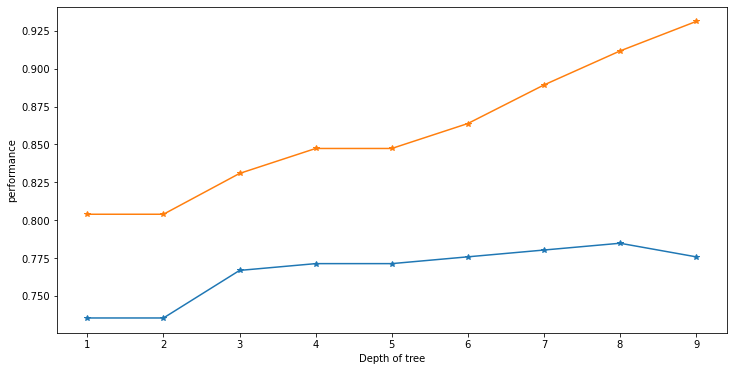

In [31]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['test_accuracy'], marker='*')
plt.plot(frame['max_depth'], frame['train_accuracy'], marker='*')
plt.xlabel('Depth of tree')
plt.ylabel('performance')

#### Keeping the low value of max_depth, didnt allow the model to learn the pattern. Hence low prformance or Underfitting

#### Magnitude of increase in Training accuracy is higher as compared to that with the Testing accuracy

#### Max_depth= 8 produces the highest Testing accuracy,Hence can set the max_depth to 8.

In [32]:
model1 = DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)
model1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

#### Training Score and Testing Score

In [33]:
model.score(X_train,y_train), model1.score(X_test,y_test)

(0.9880239520958084, 0.8116591928251121)

#### The accuracy scores are more in sync as compared to what we got previously

In [34]:
from sklearn import tree

In [35]:
decision_tree = tree.export_graphviz(model1,out_file= "tree.png",
                                     feature_names=X_train.columns,
                                     max_depth=2,filled=True)

In [36]:
!dot -Tpng tree.dot -o tree.png

Format: "png" not recognized. Use one of:


In [37]:
image = plt.imread("tree.png")
plt.figure(figsize=(15,15))
plt.imshow(image)

SyntaxError: not a PNG file (<string>)